In [1]:

import re
import datetime
from pathlib import Path
import json
from collections import defaultdict, Counter


import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats


# !pip install trueskill
from trueskill import Rating, rate, quality_1vs1, rate_1vs1, quality

In [2]:
files00 = [
    '/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/anno_Ax00.jsonl',
    '/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/anno_Bx00.jsonl',
]

files01 = [
    '/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/anno_Cx01.jsonl',
    '/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/anno_Dx01.jsonl',
]

In [3]:
save_plots = True

In [4]:
def read_annotated_jsonl(annotations):

    data = defaultdict(list)
    
    for infile in annotations:
        annotator_id = Path(infile).stem[-4:]
#         print(annotator_id)
        with open(infile, 'r', encoding='utf8') as f:
            for line in f:
                item = json.loads(line.strip())
#                 data[annotator_id].append(item)
#                 print(item)
                
                src = re.sub('[\n\r\s]+', ' ', item['src_text'])
                hyp_a = re.sub('[\n\r\s]+', ' ', item['hyp_a_text'])
                hyp_b = re.sub('[\n\r\s]+', ' ', item['hyp_b_text'])
                hyp_a_id = item['hyp_a_id'].split('/')[-3]
                hyp_b_id = item['hyp_b_id'].split('/')[-3]
                
                id = int(item['id'])
                score = float(item['score'])
                
                start_time = datetime.datetime.strptime(item['time_loaded'], '%Y-%m-%d %H:%M:%S')
                end_time = datetime.datetime.strptime(item['time_updated'], '%Y-%m-%d %H:%M:%S')
                time_taken = end_time-start_time
                
                answer = item['answer']
                winner = item['winner']
                
#                 if item['answer'] != 'reject':          
#                     if item['winner'] == 'B':
#                         winner = hyp_b_id
#                     elif item['winner'] == 'A':
#                         winner = hyp_b_id
#                     else:
#                         print(item['winner'])
                
                data[(annotator_id, id)] = {
                    'id': id,
                    'answer': answer,
                    'winner': winner,
                    'score': score,
                    'time_taken': time_taken,
                    'model_a': hyp_a_id,
                    'model_b': hyp_b_id,
                    'src': src,
                    'hyp_a': hyp_a,
                    'hyp_b': hyp_b,

                }
    
    return data


data = read_annotated_jsonl(files00+files01)
print(f'Collected {len(data)} annotated items')

Collected 501 annotated items


In [5]:
df = pd.DataFrame.from_dict(data, orient='index')
df

id  answer winner  score      time_taken           model_a  \
Ax00 11933  11933  accept      A  -20.0 6 days 22:40:09      filt_tgt_ppl   
     12613  12613  accept   None    0.0 0 days 02:06:03  filt_freq_distro   
     20347  20347  accept      A -100.0 0 days 02:01:27          baseline   
     17403  17403  accept      B  100.0 0 days 02:03:05  filt_freq_distro   
     19770  19770  accept      B  100.0 0 days 02:01:17  filt_freq_distro   
     20472  20472  accept      A -100.0 0 days 02:02:25     filt_gen_sent   
     14284  14284  accept      A  -60.0 0 days 02:01:31          baseline   
     10957  10957  reject   None    0.0 0 days 02:02:48     filt_gen_sent   
     17747  17747  reject   None    0.0 0 days 02:01:10  filt_freq_distro   
     24521  24521  reject   None    0.0 0 days 02:01:43      filt_tgt_ppl   
     19042  19042  reject   None    0.0 0 days 02:00:41          baseline   
     15045  15045  accept      A -100.0 0 days 02:01:29      filt_tgt_ppl   
     9934    9934  accept      A  -40.0 0 days 02:01:42      filt_tgt_ppl   
     9189    9189  accept      A    0.0 0 days 02:02:54     filt_gen_sent   
     17325  17325  reject   None    0.0 0 days 02:01:12          baseline   
     14483  14483  reject   None    0.0 0 days 02:01:52  filt_freq_distro   
     4528    4528  accept      A  -25.0 0 days 02:01:03     filt_gen_sent   
     3643    3643  accept      A  -30.0 0 days 02:06:15      filt_tgt_ppl   
     2214    2214  reject   None    0.0 0 days 02:00:35  filt_freq_distro   
     4982    4982  reject   None    0.0 0 days 02:01:03          baseline   
     9012    9012  reject   None    0.0 0 days 02:00:27  filt_freq_distro   
     20191  20191  reject   None    0.0 0 days 02:02:39  filt_freq_distro   
     17183  17183  reject   None    0.0 0 days 02:00:54  filt_freq_distro   
     20100  20100  accept      A  -85.0 0 days 02:01:48     filt_gen_sent   
     20089  20089  accept      B   50.0 0 days 02:00:46      filt_tgt_ppl   
     16930  16930  accept      A  -20.0 0 days 02:01:13      filt_tgt_ppl   
     24327  24327  accept      A  -25.0 0 days 02:00:56  filt_freq_distro   
     7093    7093  accept   None    0.0 0 days 02:02:59      filt_tgt_ppl   
     17078  17078  accept      B   50.0 0 days 02:03:24          baseline   
     8225    8225  reject   None    0.0 0 days 02:04:48          baseline   
     14112  14112  reject   None    0.0 0 days 02:00:21     filt_gen_sent   
     15132  15132  accept      B  100.0 0 days 02:01:26          baseline   
     5572    5572  accept      B   70.0 0 days 02:00:47          baseline   
     8211    8211  accept      B   20.0 0 days 02:02:04  filt_freq_distro   
     11402  11402  accept   None    0.0 0 days 02:02:13     filt_gen_sent   
     21588  21588  accept      A  -80.0 0 days 02:04:11     filt_gen_sent   
     21107  21107  reject   None    0.0 0 days 02:00:23     filt_gen_sent   
     2386    2386  reject   None    0.0 0 days 02:01:10          baseline   
     7649    7649  reject   None    0.0 0 days 02:00:14      filt_tgt_ppl   
     7132    7132  accept      B   20.0 0 days 02:01:10  filt_freq_distro   
     1530    1530  reject   None    0.0 0 days 02:26:41      filt_tgt_ppl   
     9284    9284  reject   None    0.0 0 days 02:27:35      filt_tgt_ppl   
     5504    5504  accept      B   30.0 0 days 02:01:43          baseline   
     13225  13225  reject   None    0.0 0 days 02:12:53          baseline   
     18424  18424  reject   None    0.0 0 days 02:00:28      filt_tgt_ppl   
     11342  11342  accept      B   80.0 0 days 02:01:12     filt_gen_sent   
     24722  24722  reject   None    0.0 0 days 02:00:31          baseline   
     6557    6557  accept   None    0.0 0 days 02:03:52     filt_gen_sent   
     21047  21047  accept      A -100.0 0 days 02:00:42     filt_gen_sent   
     4540    4540  accept      B   79.0 0 days 02:01:18          baseline   
     5214    5214  accept      A  -70.0 0 days 02:02:32      filt_tgt_ppl   
     5252  

In [6]:
def collect_ratings(rating_file):
#     with open(id_file, 'r', encoding='utf8') as id_f:
#         ids = [int(line.strip()) for line in id_f]
    with open(rating_file, 'r', encoding='utf8') as rating_f:
        
        ratings = {i: int(line.strip()) for i, line in enumerate(rating_f)}
    
    return ratings

rating_map = collect_ratings('/srv/scratch6/kew/bart/hospo_respo/en/data/hotel/500k/test.rating')
print(len(rating_map))
print(rating_map[5036])

24736
5


In [7]:
def fill_rating_col(df, rating_map=rating_map):
    ratings = []
    for i, row in df.iterrows():
        ratings.append(rating_map[i[1]])
    return ratings

df['ratings'] = fill_rating_col(df)
df

id  answer winner  score      time_taken           model_a  \
Ax00 11933  11933  accept      A  -20.0 6 days 22:40:09      filt_tgt_ppl   
     12613  12613  accept   None    0.0 0 days 02:06:03  filt_freq_distro   
     20347  20347  accept      A -100.0 0 days 02:01:27          baseline   
     17403  17403  accept      B  100.0 0 days 02:03:05  filt_freq_distro   
     19770  19770  accept      B  100.0 0 days 02:01:17  filt_freq_distro   
     20472  20472  accept      A -100.0 0 days 02:02:25     filt_gen_sent   
     14284  14284  accept      A  -60.0 0 days 02:01:31          baseline   
     10957  10957  reject   None    0.0 0 days 02:02:48     filt_gen_sent   
     17747  17747  reject   None    0.0 0 days 02:01:10  filt_freq_distro   
     24521  24521  reject   None    0.0 0 days 02:01:43      filt_tgt_ppl   
     19042  19042  reject   None    0.0 0 days 02:00:41          baseline   
     15045  15045  accept      A -100.0 0 days 02:01:29      filt_tgt_ppl   
     9934    9934  accept      A  -40.0 0 days 02:01:42      filt_tgt_ppl   
     9189    9189  accept      A    0.0 0 days 02:02:54     filt_gen_sent   
     17325  17325  reject   None    0.0 0 days 02:01:12          baseline   
     14483  14483  reject   None    0.0 0 days 02:01:52  filt_freq_distro   
     4528    4528  accept      A  -25.0 0 days 02:01:03     filt_gen_sent   
     3643    3643  accept      A  -30.0 0 days 02:06:15      filt_tgt_ppl   
     2214    2214  reject   None    0.0 0 days 02:00:35  filt_freq_distro   
     4982    4982  reject   None    0.0 0 days 02:01:03          baseline   
     9012    9012  reject   None    0.0 0 days 02:00:27  filt_freq_distro   
     20191  20191  reject   None    0.0 0 days 02:02:39  filt_freq_distro   
     17183  17183  reject   None    0.0 0 days 02:00:54  filt_freq_distro   
     20100  20100  accept      A  -85.0 0 days 02:01:48     filt_gen_sent   
     20089  20089  accept      B   50.0 0 days 02:00:46      filt_tgt_ppl   
     16930  16930  accept      A  -20.0 0 days 02:01:13      filt_tgt_ppl   
     24327  24327  accept      A  -25.0 0 days 02:00:56  filt_freq_distro   
     7093    7093  accept   None    0.0 0 days 02:02:59      filt_tgt_ppl   
     17078  17078  accept      B   50.0 0 days 02:03:24          baseline   
     8225    8225  reject   None    0.0 0 days 02:04:48          baseline   
     14112  14112  reject   None    0.0 0 days 02:00:21     filt_gen_sent   
     15132  15132  accept      B  100.0 0 days 02:01:26          baseline   
     5572    5572  accept      B   70.0 0 days 02:00:47          baseline   
     8211    8211  accept      B   20.0 0 days 02:02:04  filt_freq_distro   
     11402  11402  accept   None    0.0 0 days 02:02:13     filt_gen_sent   
     21588  21588  accept      A  -80.0 0 days 02:04:11     filt_gen_sent   
     21107  21107  reject   None    0.0 0 days 02:00:23     filt_gen_sent   
     2386    2386  reject   None    0.0 0 days 02:01:10          baseline   
     7649    7649  reject   None    0.0 0 days 02:00:14      filt_tgt_ppl   
     7132    7132  accept      B   20.0 0 days 02:01:10  filt_freq_distro   
     1530    1530  reject   None    0.0 0 days 02:26:41      filt_tgt_ppl   
     9284    9284  reject   None    0.0 0 days 02:27:35      filt_tgt_ppl   
     5504    5504  accept      B   30.0 0 days 02:01:43          baseline   
     13225  13225  reject   None    0.0 0 days 02:12:53          baseline   
     18424  18424  reject   None    0.0 0 days 02:00:28      filt_tgt_ppl   
     11342  11342  accept      B   80.0 0 days 02:01:12     filt_gen_sent   
     24722  24722  reject   None    0.0 0 days 02:00:31          baseline   
     6557    6557  accept   None    0.0 0 days 02:03:52     filt_gen_sent   
     21047  21047  accept      A -100.0 0 days 02:00:42     filt_gen_sent   
     4540    4540  accept      B   79.0 0 days 02:01:18          baseline   
     5214    5214  accept      A  -70.0 0 days 02:02:32      filt_tgt_ppl   
     5252  

In [8]:
a1 = df.loc['Ax00']
a2 = df.loc['Bx00']
a3 = df.loc['Cx01']
a4 = df.loc['Dx01']

In [9]:
# merge the answers from both annotators using inner join
df00 = pd.merge(a1, a2, left_index=True, right_index=True, suffixes=('_X', '_Y'), copy=False)
df01 = pd.merge(a3, a4, left_index=True, right_index=True, suffixes=('_X', '_Y'), copy=False)
# concatenate into a single dataframe
df = pd.concat([df00, df01])
print(df.info())
df
items_annotated = len(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 11933 to 5035
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   id_X          200 non-null    int64          
 1   answer_X      200 non-null    object         
 2   winner_X      119 non-null    object         
 3   score_X       200 non-null    float64        
 4   time_taken_X  200 non-null    timedelta64[ns]
 5   model_a_X     200 non-null    object         
 6   model_b_X     200 non-null    object         
 7   src_X         200 non-null    object         
 8   hyp_a_X       200 non-null    object         
 9   hyp_b_X       200 non-null    object         
 10  ratings_X     200 non-null    int64          
 11  id_Y          200 non-null    int64          
 12  answer_Y      200 non-null    object         
 13  winner_Y      111 non-null    object         
 14  score_Y       200 non-null    float64        
 15  time_taken_Y  200 

In [10]:
# subset df based on IAA
def get_agreement(x):
    if x.answer_X == x.answer_Y:
        return x.answer_X
    else:
        return 'disagree'
    

df['agreement'] = df.apply(get_agreement, axis=1)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 11933 to 5035
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   id_X          200 non-null    int64          
 1   answer_X      200 non-null    object         
 2   winner_X      119 non-null    object         
 3   score_X       200 non-null    float64        
 4   time_taken_X  200 non-null    timedelta64[ns]
 5   model_a_X     200 non-null    object         
 6   model_b_X     200 non-null    object         
 7   src_X         200 non-null    object         
 8   hyp_a_X       200 non-null    object         
 9   hyp_b_X       200 non-null    object         
 10  ratings_X     200 non-null    int64          
 11  id_Y          200 non-null    int64          
 12  answer_Y      200 non-null    object         
 13  winner_Y      111 non-null    object         
 14  score_Y       200 non-null    float64        
 15  time_taken_Y  200 

,id_X,answer_X,winner_X,score_X,time_taken_X,model_a_X,model_b_X,src_X,hyp_a_X,hyp_b_X,ratings_X,id_Y,answer_Y,winner_Y,score_Y,time_taken_Y,model_a_Y,model_b_Y,src_Y,hyp_a_Y,hyp_b_Y,ratings_Y,agreement
11933,11933,accept,A,-20.0,6 days 22:40:09,filt_tgt_ppl,filt_freq_distro,nice clean hotel with really comfy beds ---SEP...,Thank you for taking the time to review Amity ...,Thank you for taking the time to review Amity ...,4,11933,accept,A,-75.0,5 days 11:20:26,filt_tgt_ppl,filt_freq_distro,nice clean hotel with really comfy beds ---SEP...,Thank you for taking the time to review Amity ...,Thank you for taking the time to review Amity ...,4,accept
12613,12613,accept,None,0.0,0 days 02:06:03,filt_freq_distro,filt_gen_sent,Bottom of the Bottle!!! ---SEP--- Ambience was...,"Dear Valued Guest, Thank you for taking the ti...","Dear Valued Guest, Thank you for taking the ti...",2,12613,reject,None,0.0,0 days 14:24:09,filt_freq_distro,filt_gen_sent,Bottom of the Bottle!!! ---SEP--- Ambience was...,"Dear Valued Guest, Thank you for taking the ti...","Dear Valued Guest, Thank you for taking the ti...",2,disagree
20347,20347,accept,A,-100.0,0 days 02:01:27,baseline,filt_tgt_ppl,Family visit and Theatre trip. ---SEP--- Recen...,"Dear Guest, Thank you so much for you valued f...","Dear Guest, Thank you for taking your time to ...",5,20347,accept,A,-33.0,0 days 02:56:30,baseline,filt_tgt_ppl,Family visit and Theatre trip. ---SEP--- Recen...,"Dear Guest, Thank you so much for you valued f...","Dear Guest, Thank you for taking your time to ...",5,accept
17403,17403,accept,B,100.0,0 days 02:03:05,filt_freq_distro,filt_gen_sent,Visit Canmore ---SEP--- I booked a room online...,"Dear Valued Guest, Thank you for taking the ti...","Dear Valued Guest, Thank you for taking the ti...",5,17403,accept,B,33.0,0 days 02:57:02,filt_freq_distro,filt_gen_sent,Visit Canmore ---SEP--- I booked a room online...,"Dear Valued Guest, Thank you for taking the ti...","Dear Valued Guest, Thank you for taking the ti...",5,accept
19770,19770,accept,B,100.0,0 days 02:01:17,filt_freq_distro,filt_tgt_ppl,Great value ---SEP--- Fun hotel in central loc...,"Dear Guest, Thank you for taking the time to w...","Dear Guest, Thank you for taking the time to r...",4,19770,accept,B,50.0,0 days 02:47:55,filt_freq_distro,filt_tgt_ppl,Great value ---SEP--- Fun hotel in central loc...,"Dear Guest, Thank you for taking the time to w...","Dear Guest, Thank you for taking the time to r...",4,accept


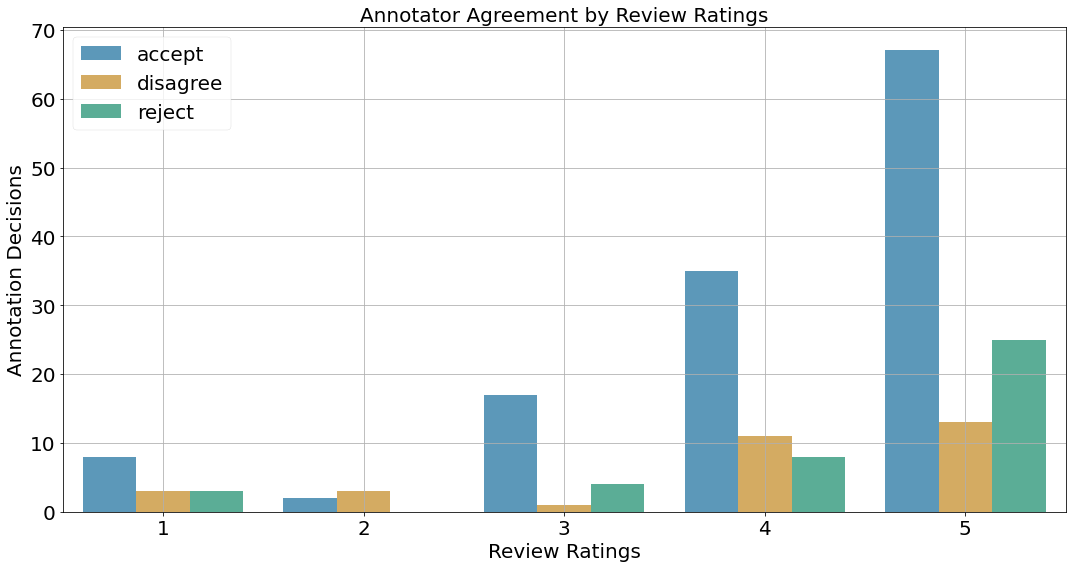

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
fs = 20

cm = sns.color_palette("colorblind")

with plt.style.context(('seaborn-talk')):
    sns.countplot(data=df, x='ratings_X', hue='agreement', alpha=0.7, ax = ax, palette=cm)
    ax.legend(fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.title('Annotator Agreement by Review Ratings', fontsize=fs)
    plt.grid()
    plt.xlabel('Review Ratings', fontsize=fs)
    plt.ylabel('Annotation Decisions', fontsize=fs)
    plt.tight_layout()
    if save_plots:
        plt.savefig('/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/trueskill_ranking/annotator_agreement_ratings.pdf', dpi=300)
        plt.savefig('/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/trueskill_ranking/annotator_agreement_ratings.png', dpi=300)

    

In [12]:
print(df['agreement'].value_counts())

# take only items that are agreed accepts
df = df[df['agreement'] == 'accept']
print(len(df))
# len(df[df['agreement'] == 'accept'])


accept      129
reject       40
disagree     31
Name: agreement, dtype: int64
129


In [13]:
# df = df[df['answer_A'] == df['answer_B']]
# subset df to items that annotators agree on the winner
# df = df[df['winner_A'] == df['winner_B']]
# draw_threshold = 10
# -10 < scores < 10 are considered draws
# df = df[(df['score_A'] >= draw_threshold) | (df['score_A'] <= -draw_threshold) & (df['score_B'] >= draw_threshold) | (df['score_B'] <= -draw_threshold)]


In [14]:

def summarize_result(x):
    """
    returns a tuple (candidate_a, candidate_a, ranking)
    """
    
    if x['winner_X'] == 'A':
        ranking = [0, 1]
    elif x['winner_X'] == 'B': # B beats A – ranks=[1, 0] (Lower rank is better)
        ranking = [1, 0]
    else:
        ranking = [0, 0]
    summary = (x['model_a_X'], x['model_b_X'], ranking)
    return summary

df['result'] = df.apply(lambda x: summarize_result(x), axis=1)
df.head()

,id_X,answer_X,winner_X,score_X,time_taken_X,model_a_X,model_b_X,src_X,hyp_a_X,hyp_b_X,ratings_X,id_Y,answer_Y,winner_Y,score_Y,time_taken_Y,model_a_Y,model_b_Y,src_Y,hyp_a_Y,hyp_b_Y,ratings_Y,agreement,result
11933,11933,accept,A,-20.0,6 days 22:40:09,filt_tgt_ppl,filt_freq_distro,nice clean hotel with really comfy beds ---SEP...,Thank you for taking the time to review Amity ...,Thank you for taking the time to review Amity ...,4,11933,accept,A,-75.0,5 days 11:20:26,filt_tgt_ppl,filt_freq_distro,nice clean hotel with really comfy beds ---SEP...,Thank you for taking the time to review Amity ...,Thank you for taking the time to review Amity ...,4,accept,"(filt_tgt_ppl, filt_freq_distro, [0, 1])"
20347,20347,accept,A,-100.0,0 days 02:01:27,baseline,filt_tgt_ppl,Family visit and Theatre trip. ---SEP--- Recen...,"Dear Guest, Thank you so much for you valued f...","Dear Guest, Thank you for taking your time to ...",5,20347,accept,A,-33.0,0 days 02:56:30,baseline,filt_tgt_ppl,Family visit and Theatre trip. ---SEP--- Recen...,"Dear Guest, Thank you so much for you valued f...","Dear Guest, Thank you for taking your time to ...",5,accept,"(baseline, filt_tgt_ppl, [0, 1])"
17403,17403,accept,B,100.0,0 days 02:03:05,filt_freq_distro,filt_gen_sent,Visit Canmore ---SEP--- I booked a room online...,"Dear Valued Guest, Thank you for taking the ti...","Dear Valued Guest, Thank you for taking the ti...",5,17403,accept,B,33.0,0 days 02:57:02,filt_freq_distro,filt_gen_sent,Visit Canmore ---SEP--- I booked a room online...,"Dear Valued Guest, Thank you for taking the ti...","Dear Valued Guest, Thank you for taking the ti...",5,accept,"(filt_freq_distro, filt_gen_sent, [1, 0])"
19770,19770,accept,B,100.0,0 days 02:01:17,filt_freq_distro,filt_tgt_ppl,Great value ---SEP--- Fun hotel in central loc...,"Dear Guest, Thank you for taking the time to w...","Dear Guest, Thank you for taking the time to r...",4,19770,accept,B,50.0,0 days 02:47:55,filt_freq_distro,filt_tgt_ppl,Great value ---SEP--- Fun hotel in central loc...,"Dear Guest, Thank you for taking the time to w...","Dear Guest, Thank you for taking the time to r...",4,accept,"(filt_freq_distro, filt_tgt_ppl, [1, 0])"
20472,20472,accept,A,-100.0,0 days 02:02:25,filt_gen_sent,filt_tgt_ppl,Great short stay! ---SEP--- There were 12 of u...,Thank you so much for taking the time to write...,"Dear Valued Guest, Thank you for taking the ti...",4,20472,accept,A,-66.0,0 days 02:49:47,filt_gen_sent,filt_tgt_ppl,Great short stay! ---SEP--- There were 12 of u...,Thank you so much for taking the time to write...,"Dear Valued Guest, Thank you for taking the ti...",4,accept,"(filt_gen_sent, filt_tgt_ppl, [0, 1])"


In [15]:
results = df['result'].tolist()
print(len(results))
print(results[:10])

129
[('filt_tgt_ppl', 'filt_freq_distro', [0, 1]), ('baseline', 'filt_tgt_ppl', [0, 1]), ('filt_freq_distro', 'filt_gen_sent', [1, 0]), ('filt_freq_distro', 'filt_tgt_ppl', [1, 0]), ('filt_gen_sent', 'filt_tgt_ppl', [0, 1]), ('baseline', 'filt_freq_distro', [0, 1]), ('filt_tgt_ppl', 'filt_gen_sent', [0, 1]), ('filt_tgt_ppl', 'filt_freq_distro', [0, 1]), ('filt_gen_sent', 'filt_freq_distro', [0, 1]), ('filt_tgt_ppl', 'filt_freq_distro', [0, 1])]


In [16]:
models = df['model_a_X'].unique()
models = {m: Rating() for m in models}
print(models)

{'filt_tgt_ppl': trueskill.Rating(mu=25.000, sigma=8.333), 'baseline': trueskill.Rating(mu=25.000, sigma=8.333), 'filt_freq_distro': trueskill.Rating(mu=25.000, sigma=8.333), 'filt_gen_sent': trueskill.Rating(mu=25.000, sigma=8.333)}


In [17]:
x_min = 0
x_max = 50

fs=12

model_ids = {
    'baseline': 'Baseline',
    'filt_freq_distro': 'Lex. freq.',
    'filt_gen_sent': 'Sent. avg.',
    'filt_tgt_ppl': 'LM PPL',
}

cm = sns.color_palette("colorblind")

def plot_models(model_ids, models, iteration=0):
    
    with plt.style.context(('seaborn-talk')):
        for i, model in enumerate(model_ids):
            x = np.linspace(x_min, x_max, 100)
            print(models[model])
            y = scipy.stats.norm.pdf(x, models[model].mu, models[model].sigma)
            ax.plot(x, y, label=model_ids[model], linewidth=3, alpha=1, color=cm[i])
            plt.fill(x, y, facecolor=cm[i], alpha=0.3)

        # show legend
        ax.legend(fontsize=fs)
        plt.xticks(fontsize=fs)
        plt.xticks(list(range(x_min, x_max+1, 5)))
        plt.yticks(fontsize=fs)
#         plt.title('TrueSkill Rankings', fontsize=fs)
#         plt.grid()
        plt.xlabel('Score', fontsize=fs)
        plt.tight_layout()
        if save_plots:
            plt.savefig(f'/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/trueskill_ranking/trueskill_ranking_{iteration}.png', dpi=150)
        plt.clf()
        
if save_plots:
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    plot_models(model_ids, models, 0)



trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)


<Figure size 576x432 with 0 Axes>

In [18]:
models['filt_tgt_ppl']

trueskill.Rating(mu=25.000, sigma=8.333)

In [19]:
model_updates = defaultdict(list)

for i, (m1, m2, ranking) in enumerate(results, 1):
    if m1 not in model_updates:
        model_updates[m1].append(models[m1].sigma)
    if m2 not in model_updates:
        model_updates[m2].append(models[m2].sigma)    
    print('Pre-match', m1, ':', models[m1], m2, ':', models[m2], ranking)
    (models[m1],), (models[m2],) = rate([(models[m1],), (models[m2],)], ranks=ranking)
    print('Post-match', m1, ':', models[m1], m2, ':', models[m2])
    model_updates[m1].append(models[m1].sigma)
    model_updates[m2].append(models[m2].sigma)
    if save_plots:
        plot_models(model_ids, models, i)
    print()


Pre-match filt_tgt_ppl : trueskill.Rating(mu=25.000, sigma=8.333) filt_freq_distro : trueskill.Rating(mu=25.000, sigma=8.333) [0, 1]
Post-match filt_tgt_ppl : trueskill.Rating(mu=29.396, sigma=7.171) filt_freq_distro : trueskill.Rating(mu=20.604, sigma=7.171)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=20.604, sigma=7.171)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=29.396, sigma=7.171)

Pre-match baseline : trueskill.Rating(mu=25.000, sigma=8.333) filt_tgt_ppl : trueskill.Rating(mu=29.396, sigma=7.171) [0, 1]
Post-match baseline : trueskill.Rating(mu=30.997, sigma=6.873) filt_tgt_ppl : trueskill.Rating(mu=24.954, sigma=6.265)
trueskill.Rating(mu=30.997, sigma=6.873)
trueskill.Rating(mu=20.604, sigma=7.171)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=24.954, sigma=6.265)

Pre-match filt_freq_distro : trueskill.Rating(mu=20.604, sigma=7.171) filt_gen_sent : trueskill.Rating(mu=25.000, sigma=8.333) [1, 0]
Post-match filt_freq_distro : tr


Pre-match filt_gen_sent : trueskill.Rating(mu=28.807, sigma=2.711) baseline : trueskill.Rating(mu=19.846, sigma=3.657) [0, 1]
Post-match filt_gen_sent : trueskill.Rating(mu=29.055, sigma=2.650) baseline : trueskill.Rating(mu=19.395, sigma=3.505)
trueskill.Rating(mu=19.395, sigma=3.505)
trueskill.Rating(mu=21.973, sigma=3.527)
trueskill.Rating(mu=29.055, sigma=2.650)
trueskill.Rating(mu=28.825, sigma=2.851)

Pre-match filt_freq_distro : trueskill.Rating(mu=21.973, sigma=3.527) filt_tgt_ppl : trueskill.Rating(mu=28.825, sigma=2.851) [1, 0]
Post-match filt_freq_distro : trueskill.Rating(mu=21.373, sigma=3.356) filt_tgt_ppl : trueskill.Rating(mu=29.217, sigma=2.762)
trueskill.Rating(mu=19.395, sigma=3.505)
trueskill.Rating(mu=21.373, sigma=3.356)
trueskill.Rating(mu=29.055, sigma=2.650)
trueskill.Rating(mu=29.217, sigma=2.762)

Pre-match baseline : trueskill.Rating(mu=19.395, sigma=3.505) filt_tgt_ppl : trueskill.Rating(mu=29.217, sigma=2.762) [1, 0]
Post-match baseline : trueskill.Rating


Pre-match baseline : trueskill.Rating(mu=21.749, sigma=2.217) filt_freq_distro : trueskill.Rating(mu=24.524, sigma=2.185) [1, 0]
Post-match baseline : trueskill.Rating(mu=21.296, sigma=2.148) filt_freq_distro : trueskill.Rating(mu=24.964, sigma=2.119)
trueskill.Rating(mu=21.296, sigma=2.148)
trueskill.Rating(mu=24.964, sigma=2.119)
trueskill.Rating(mu=27.055, sigma=1.987)
trueskill.Rating(mu=27.592, sigma=1.907)

Pre-match filt_gen_sent : trueskill.Rating(mu=27.055, sigma=1.987) filt_freq_distro : trueskill.Rating(mu=24.964, sigma=2.119) [0, 1]
Post-match filt_gen_sent : trueskill.Rating(mu=27.459, sigma=1.934) filt_freq_distro : trueskill.Rating(mu=24.505, sigma=2.054)
trueskill.Rating(mu=21.296, sigma=2.148)
trueskill.Rating(mu=24.505, sigma=2.054)
trueskill.Rating(mu=27.459, sigma=1.934)
trueskill.Rating(mu=27.592, sigma=1.907)

Pre-match filt_gen_sent : trueskill.Rating(mu=27.459, sigma=1.934) filt_freq_distro : trueskill.Rating(mu=24.505, sigma=2.054) [0, 1]
Post-match filt_gen_s


Pre-match filt_gen_sent : trueskill.Rating(mu=27.387, sigma=1.508) baseline : trueskill.Rating(mu=20.323, sigma=1.990) [1, 0]
Post-match filt_gen_sent : trueskill.Rating(mu=26.780, sigma=1.476) baseline : trueskill.Rating(mu=21.378, sigma=1.910)
trueskill.Rating(mu=21.378, sigma=1.910)
trueskill.Rating(mu=24.868, sigma=1.471)
trueskill.Rating(mu=26.780, sigma=1.476)
trueskill.Rating(mu=27.862, sigma=1.500)

Pre-match filt_tgt_ppl : trueskill.Rating(mu=27.862, sigma=1.500) filt_gen_sent : trueskill.Rating(mu=26.780, sigma=1.476) [0, 0]
Post-match filt_tgt_ppl : trueskill.Rating(mu=27.800, sigma=1.458) filt_gen_sent : trueskill.Rating(mu=26.840, sigma=1.436)
trueskill.Rating(mu=21.378, sigma=1.910)
trueskill.Rating(mu=24.868, sigma=1.471)
trueskill.Rating(mu=26.840, sigma=1.436)
trueskill.Rating(mu=27.800, sigma=1.458)

Pre-match baseline : trueskill.Rating(mu=21.378, sigma=1.910) filt_freq_distro : trueskill.Rating(mu=24.868, sigma=1.471) [1, 0]
Post-match baseline : trueskill.Rating(m


Pre-match baseline : trueskill.Rating(mu=19.974, sigma=1.694) filt_freq_distro : trueskill.Rating(mu=25.035, sigma=1.291) [1, 0]
Post-match baseline : trueskill.Rating(mu=19.783, sigma=1.667) filt_freq_distro : trueskill.Rating(mu=25.146, sigma=1.281)
trueskill.Rating(mu=19.783, sigma=1.667)
trueskill.Rating(mu=25.146, sigma=1.281)
trueskill.Rating(mu=27.086, sigma=1.264)
trueskill.Rating(mu=28.245, sigma=1.281)

Pre-match baseline : trueskill.Rating(mu=19.783, sigma=1.667) filt_tgt_ppl : trueskill.Rating(mu=28.245, sigma=1.281) [1, 0]
Post-match baseline : trueskill.Rating(mu=19.690, sigma=1.651) filt_tgt_ppl : trueskill.Rating(mu=28.300, sigma=1.275)
trueskill.Rating(mu=19.690, sigma=1.651)
trueskill.Rating(mu=25.146, sigma=1.281)
trueskill.Rating(mu=27.086, sigma=1.264)
trueskill.Rating(mu=28.300, sigma=1.275)

Pre-match filt_freq_distro : trueskill.Rating(mu=25.146, sigma=1.281) filt_gen_sent : trueskill.Rating(mu=27.086, sigma=1.264) [0, 1]
Post-match filt_freq_distro : trueskill


Pre-match filt_tgt_ppl : trueskill.Rating(mu=28.031, sigma=1.177) filt_freq_distro : trueskill.Rating(mu=25.460, sigma=1.119) [0, 1]
Post-match filt_tgt_ppl : trueskill.Rating(mu=28.171, sigma=1.167) filt_freq_distro : trueskill.Rating(mu=25.332, sigma=1.111)
trueskill.Rating(mu=21.790, sigma=1.347)
trueskill.Rating(mu=25.332, sigma=1.111)
trueskill.Rating(mu=25.772, sigma=1.145)
trueskill.Rating(mu=28.171, sigma=1.167)

Pre-match baseline : trueskill.Rating(mu=21.790, sigma=1.347) filt_freq_distro : trueskill.Rating(mu=25.332, sigma=1.111) [0, 1]
Post-match baseline : trueskill.Rating(mu=22.171, sigma=1.324) filt_freq_distro : trueskill.Rating(mu=25.072, sigma=1.100)
trueskill.Rating(mu=22.171, sigma=1.324)
trueskill.Rating(mu=25.072, sigma=1.100)
trueskill.Rating(mu=25.772, sigma=1.145)
trueskill.Rating(mu=28.171, sigma=1.167)

Pre-match filt_tgt_ppl : trueskill.Rating(mu=28.171, sigma=1.167) filt_gen_sent : trueskill.Rating(mu=25.772, sigma=1.145) [1, 0]
Post-match filt_tgt_ppl : t


Pre-match baseline : trueskill.Rating(mu=22.269, sigma=1.242) filt_gen_sent : trueskill.Rating(mu=26.211, sigma=1.035) [1, 0]
Post-match baseline : trueskill.Rating(mu=22.143, sigma=1.232) filt_gen_sent : trueskill.Rating(mu=26.299, sigma=1.031)
trueskill.Rating(mu=22.143, sigma=1.232)
trueskill.Rating(mu=24.614, sigma=1.004)
trueskill.Rating(mu=26.299, sigma=1.031)
trueskill.Rating(mu=28.138, sigma=1.091)

Pre-match filt_tgt_ppl : trueskill.Rating(mu=28.138, sigma=1.091) filt_gen_sent : trueskill.Rating(mu=26.299, sigma=1.031) [1, 0]
Post-match filt_tgt_ppl : trueskill.Rating(mu=27.924, sigma=1.081) filt_gen_sent : trueskill.Rating(mu=26.490, sigma=1.024)
trueskill.Rating(mu=22.143, sigma=1.232)
trueskill.Rating(mu=24.614, sigma=1.004)
trueskill.Rating(mu=26.490, sigma=1.024)
trueskill.Rating(mu=27.924, sigma=1.081)

Pre-match filt_tgt_ppl : trueskill.Rating(mu=27.924, sigma=1.081) filt_gen_sent : trueskill.Rating(mu=26.490, sigma=1.024) [0, 1]
Post-match filt_tgt_ppl : trueskill.Rat

<Figure size 748.8x514.8 with 0 Axes>

In [20]:
models
# {'filt_tgt_ppl': trueskill.Rating(mu=27.647, sigma=1.038),
#  'baseline': trueskill.Rating(mu=21.987, sigma=1.220),
#  'filt_freq_distro': trueskill.Rating(mu=24.796, sigma=0.974),
#  'filt_gen_sent': trueskill.Rating(mu=26.665, sigma=1.006)}

{'filt_tgt_ppl': trueskill.Rating(mu=27.647, sigma=1.038),
 'baseline': trueskill.Rating(mu=21.987, sigma=1.220),
 'filt_freq_distro': trueskill.Rating(mu=24.796, sigma=0.974),
 'filt_gen_sent': trueskill.Rating(mu=26.665, sigma=1.006)}

In [21]:
for m in models:
    print(m, ':', models[m].exposure)

filt_tgt_ppl : 24.534285234645942
baseline : 18.325771201541315
filt_freq_distro : 21.873328244730427
filt_gen_sent : 23.647986120277253


In [22]:
models = {m: (models[m], models[m].exposure) for m in models.keys()}

In [23]:
print(models)
leaderboard = sorted(models, key=lambda x: models[x][1], reverse=True)
print(leaderboard)

{'filt_tgt_ppl': (trueskill.Rating(mu=27.647, sigma=1.038), 24.534285234645942), 'baseline': (trueskill.Rating(mu=21.987, sigma=1.220), 18.325771201541315), 'filt_freq_distro': (trueskill.Rating(mu=24.796, sigma=0.974), 21.873328244730427), 'filt_gen_sent': (trueskill.Rating(mu=26.665, sigma=1.006), 23.647986120277253)}
['filt_tgt_ppl', 'filt_gen_sent', 'filt_freq_distro', 'baseline']


(trueskill.Rating(mu=21.987, sigma=1.220), 18.325771201541315)
(trueskill.Rating(mu=24.796, sigma=0.974), 21.873328244730427)
(trueskill.Rating(mu=26.665, sigma=1.006), 23.647986120277253)
(trueskill.Rating(mu=27.647, sigma=1.038), 24.534285234645942)


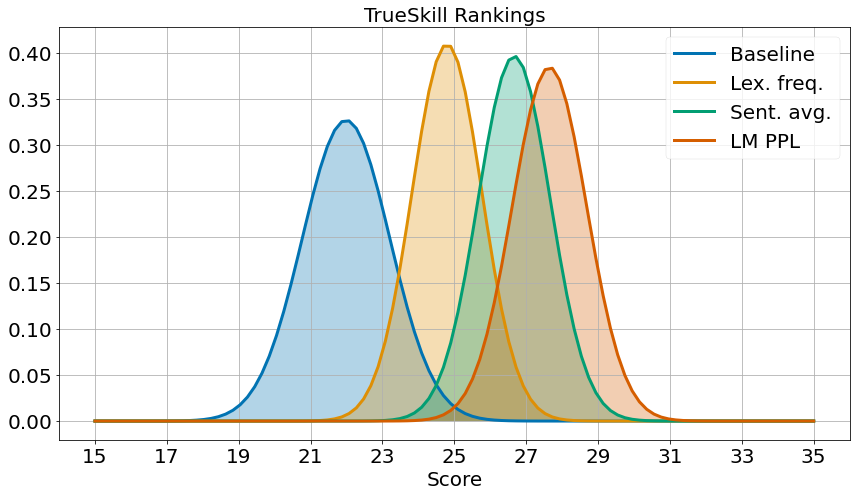

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))

x_min = 15
x_max = 35

fs=20

with plt.style.context(('seaborn-talk')):
    for i, model in enumerate(model_ids):
        x = np.linspace(x_min, x_max, 100)
        print(models[model])
        y = scipy.stats.norm.pdf(x, models[model][0].mu, models[model][0].sigma)
    #     sns.lineplot(x=x,y=y, ax=ax, palette=sns.color_palette("husl", 8))
        ax.plot(x, y, label=model_ids[model], linewidth=3, alpha=1, color=cm[i])
        plt.fill(x, y, facecolor=cm[i], alpha=0.3)

    # show legend
    ax.legend(fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.xticks(list(range(x_min, x_max+1, 2)))
    plt.yticks(fontsize=fs)
    plt.title('TrueSkill Rankings', fontsize=fs)
    plt.grid(True)
    plt.xlabel('Score', fontsize=fs)
    plt.tight_layout()
    if save_plots:
        plt.savefig('/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/trueskill_ranking/trueskill_ranking_final.pdf', dpi=300)
        plt.savefig('/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/trueskill_ranking/trueskill_ranking_final.png', dpi=300)


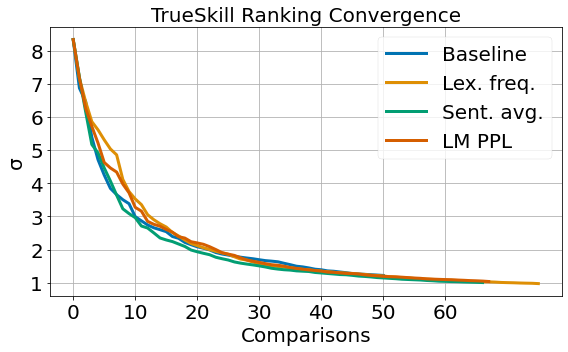

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

with plt.style.context(('seaborn-talk')):
    for i, model in enumerate(model_ids):
    #     print(len(model_updates[model]))
        ax.plot(model_updates[model], linewidth=3, alpha=1, color=cm[i], label=model_ids[model])
        ax.legend(fontsize=fs)

    plt.xticks(fontsize=fs)
    plt.xticks(list(range(0, 61, 10)))
    plt.yticks(fontsize=fs)
    plt.title('TrueSkill Ranking Convergence', fontsize=fs)
    plt.grid()
    plt.xlabel('Comparisons', fontsize=fs)
    plt.ylabel('\u03C3', fontsize=fs)
    plt.tight_layout()
    if save_plots:
        plt.savefig('/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/trueskill_ranking/trueskill_convergence_final.pdf', dpi=300)
        plt.savefig('/mnt/storage/clwork/users/kew/readvisor/rrgen_human_evaluation_schema/data/210914/trueskill_ranking/trueskill_convergence_final.png', dpi=300)
    

In [42]:
print(df['model_a_X'].value_counts())
print(df['model_b_X'].value_counts())

filt_tgt_ppl        35
filt_freq_distro    33
baseline            31
filt_gen_sent       30
Name: model_a_X, dtype: int64
filt_freq_distro    42
filt_gen_sent       36
filt_tgt_ppl        32
baseline            19
Name: model_b_X, dtype: int64


In [43]:
# competitions seen
comps = Counter()
for result in results:
    comp = tuple(sorted([result[0], result[1]]))
    comps[comp] += 1

for comp, count in sorted(comps.items()):
    print(f"{comp[0]} vs. {comp[1]} seen {count} times")

baseline vs. filt_freq_distro seen 20 times
baseline vs. filt_gen_sent seen 16 times
baseline vs. filt_tgt_ppl seen 14 times
filt_freq_distro vs. filt_gen_sent seen 26 times
filt_freq_distro vs. filt_tgt_ppl seen 29 times
filt_gen_sent vs. filt_tgt_ppl seen 24 times


In [27]:
# Average annotation time (outliers removed due to start_time=loading time)
time_delta = df['time_taken_X']
time_delta = time_delta[~((time_delta-time_delta.mean()).abs() > 3*time_delta.std())]
time_delta.mean()
# time_delta.astype('timedelta64[m]').plot()

Timedelta('0 days 02:03:27.296875')

In [28]:
from statistics import NormalDist

NormalDist(mu=models['filt_tgt_ppl'][0].mu, sigma=models['filt_tgt_ppl'][0].sigma)

NormalDist(mu=27.64689901078063, sigma=1.037537925378229)

In [31]:
models

{'filt_tgt_ppl': (trueskill.Rating(mu=27.647, sigma=1.038),
  24.534285234645942),
 'baseline': (trueskill.Rating(mu=21.987, sigma=1.220), 18.325771201541315),
 'filt_freq_distro': (trueskill.Rating(mu=24.796, sigma=0.974),
  21.873328244730427),
 'filt_gen_sent': (trueskill.Rating(mu=26.665, sigma=1.006),
  23.647986120277253)}

In [32]:
# compare samples
from scipy.stats import ttest_ind, ttest_rel

a = scipy.stats.norm.pdf(x, models['filt_tgt_ppl'][0].mu, models['filt_tgt_ppl'][0].sigma)
b = scipy.stats.norm.pdf(x, models['baseline'][0].mu, models['baseline'][0].sigma)
# print(a)
stat, p = ttest_ind(a, b)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print(stat)
print(p)
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=0.000, p=1.000
1.0570816887758548e-08
0.999999991576351
Same distributions (fail to reject H0)


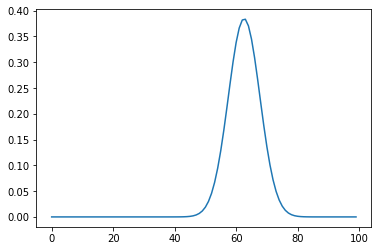

In [34]:
plt.plot(a)

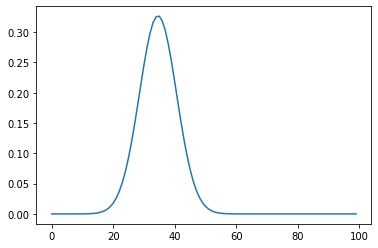

In [36]:
plt.plot(b)

In [35]:
len(a)

100

In [37]:
sum(a)

4.9499999999984645

In [38]:
sum(b)

4.949999984973389

In [35]:
for i, r in df.iterrows():
#     print(r)
#     print(type(r))
#     print(r.score_X, r.score_Y)
    print(abs(r.score_X - r.score_Y))

55.0
67.0
67.0
50.0
34.0
40.0
50.0
15.0
8.0
70.0
10.0
50.0
80.0
91.0
25.0
50.0
34.0
29.0
20.0
66.0
20.0
46.0
45.0
47.0
0.0
0.0
21.0
5.0
50.0
46.0
36.0
20.0
25.0
46.0
30.0
20.0
10.0
45.0
80.0
0.0
30.0
80.0
75.0
50.0
23.0
40.0
0.0
60.0
23.0
0.0
5.0
8.0
0.0
40.0
30.0
7.0
10.0
9.0
36.0
31.0
20.0
0.0
10.0
64.0
37.0
5.0
10.0
1.0
66.0
61.0
13.0
64.0
19.0
55.0
50.0
28.0
6.0
28.0
32.0
12.0
38.0
22.0
70.0
17.0
0.0
6.0
100.0
32.0
0.0
3.0
0.0
16.0
22.0
20.0
32.0
20.0
31.0
0.0
19.0
8.0
12.0
11.0
18.0
57.0
21.0
0.0
22.0
31.0
19.0
38.0
25.0
0.0
60.0
52.0
4.0
36.0
70.0
20.0
43.0
8.0
3.0
5.0
52.0
25.0
30.0
31.0
33.0
22.0
0.0
